In [34]:
import pandas as pd
import numpy as np

## Import Data

In [35]:
# Uploading data

train = pd.read_csv("train.csv", parse_dates = ["datetime"])
test = pd.read_csv("test.csv", parse_dates = ["datetime"])
print(train.shape)
print(test.shape)
train.head()

(10886, 12)
(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Exploring and Preprocessing

In [36]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### datetime

/Users/juliapark/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


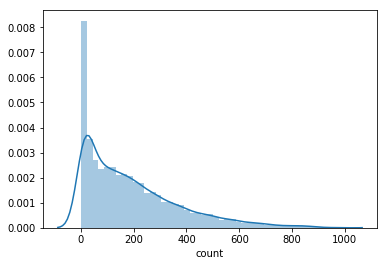

In [37]:
sns.distplot(train["count"])

In [38]:
train["log_count"] = np.log(train["count"] + 1)
print(train.shape)
train[["count", "log_count"]].head()

(10886, 13)


,count,log_count
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


/Users/juliapark/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/juliapark/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


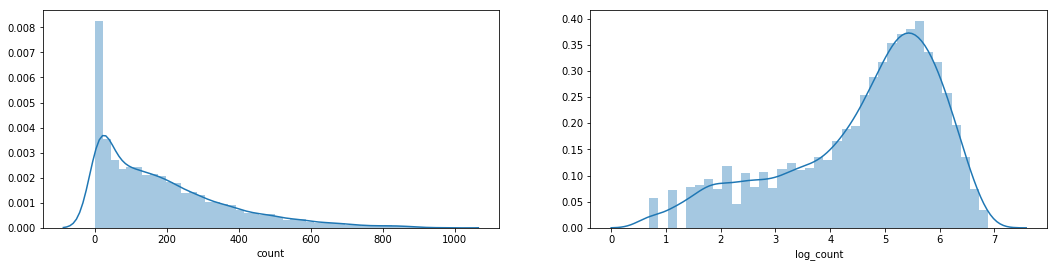

In [39]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.distplot(train["count"], ax=ax1)
sns.distplot(train["log_count"], ax=ax2)


In [40]:
train["count(recover)"] = np.exp(train["log_count"]) - 1
print(train.shape)
train[["count", "log_count", "count(recover)"]].head()

(10886, 14)


,count,log_count,count(recover)
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


/Users/juliapark/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


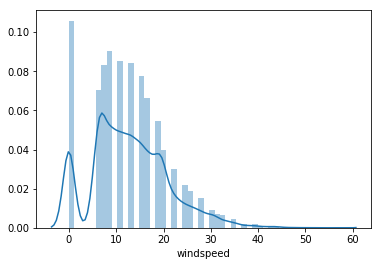

In [41]:
sns.distplot(train["windspeed"])

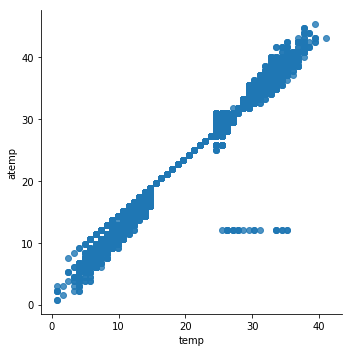

In [42]:
sns.lmplot(data=train, x="temp", y = "atemp", fit_reg = False)
# import matplotlib.pyplot as plt
# plt.subplots(nrows=2, ncols= 3)

### datetime

In [43]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

train["datetime-dayofweek"] = train["datetime"].dt.dayofweek
train.loc[train["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
train.loc[train["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
train.loc[train["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
train.loc[train["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
train.loc[train["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
train.loc[train["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
train.loc[train["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"


test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

test["datetime-dayofweek"] = test["datetime"].dt.dayofweek
# train.loc[test["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
# train.loc[test["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
# train.loc[test["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
# train.loc[test["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
# train.loc[test["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
# train.loc[test["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
# train.loc[test["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,log_count,count(recover),datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,2.833213,16.0,2011,1,1,0,0,0,5,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,3.713572,40.0,2011,1,1,1,0,0,5,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,3.496508,32.0,2011,1,1,2,0,0,5,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,2.639057,13.0,2011,1,1,3,0,0,5,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0.693147,1.0,2011,1,1,4,0,0,5,Saturday


In [44]:
## Year + Month

train["datetime-year_month"] = train["datetime-year"].astype('str') + "-" + train["datetime-month"].astype('str')
train.head()

test["datetime-year_month"] = test["datetime-year"].astype('str') + "-" + test["datetime-month"].astype('str')
test.head()

year_month = train["datetime-year_month"].unique()

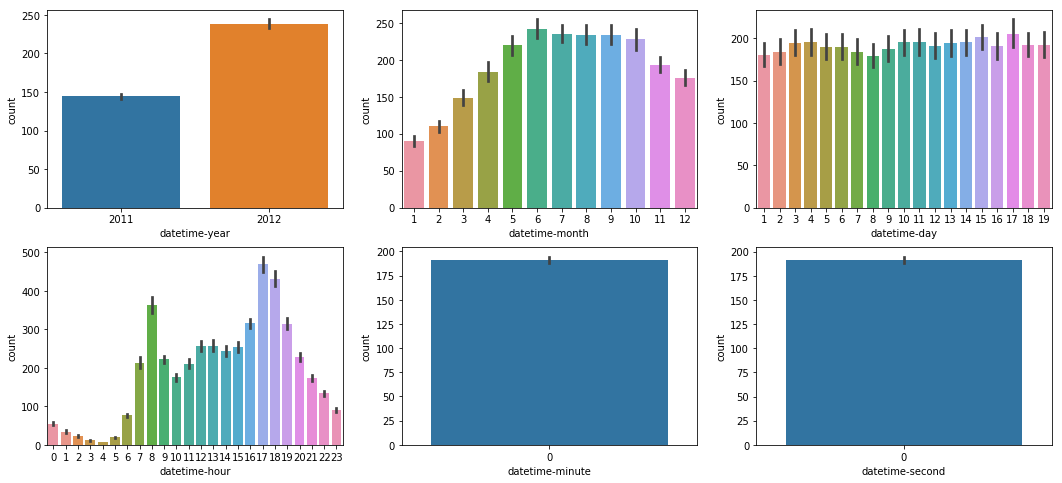

In [45]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

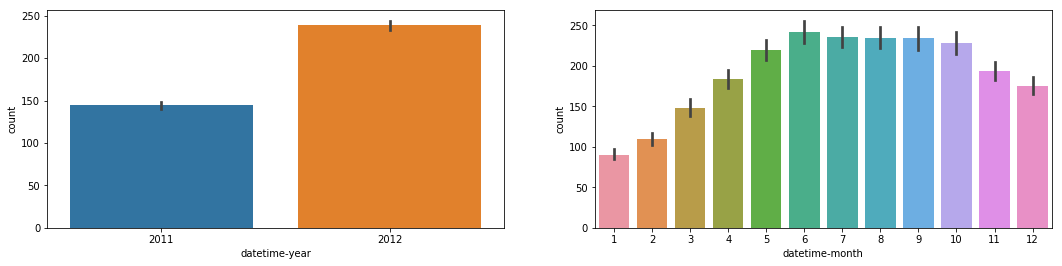

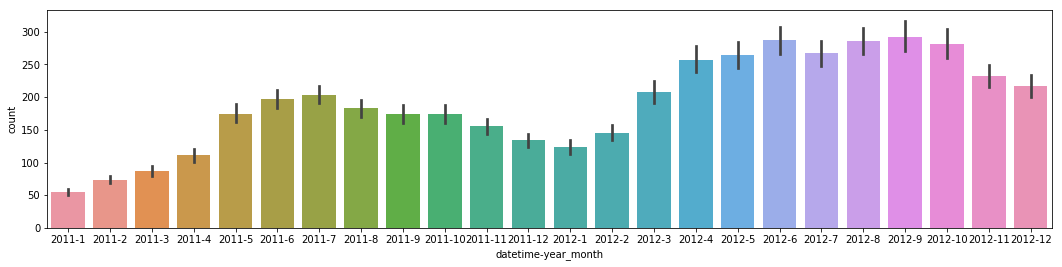

In [46]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(18, 4)

sns.barplot(data=train, x = "datetime-year", y = "count", ax=ax1)
sns.barplot(data=train, x = "datetime-month", y = "count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

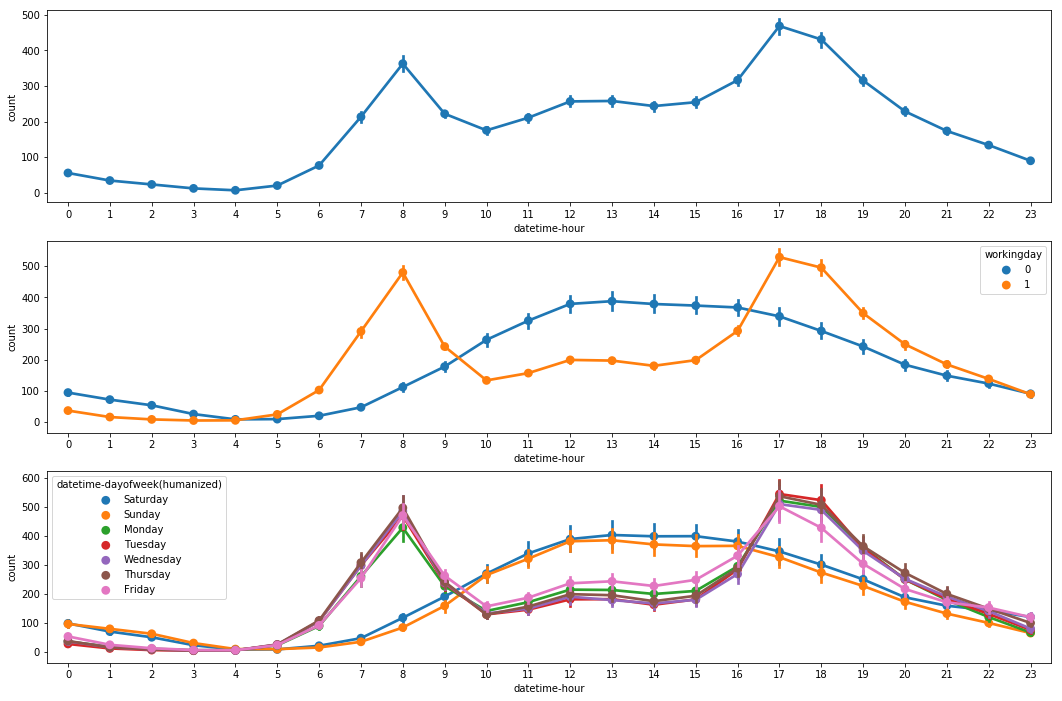

In [47]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

figure.set_size_inches(18, 12)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek(humanized)", ax=ax3)

In [48]:
import numpy as np
# filling in zeroes in ["windspeed"]

# # train
# train["prev-windspeed"] = train["windspeed"].shift(+1).fillna(0)
# train["next-windspeed"] = train["windspeed"].shift(-1).fillna(0)

# train["windspeed-interpolate"] = (train["prev-windspeed"] + train["next-windspeed"])/2
# train["windspeed-fill"] = train["windspeed"]

# train.loc[train["windspeed"] == 0, "windspeed-fill"] = train.loc[train["windspeed"] == 0,"windspeed-interpolate"]
# train[["windspeed", "windspeed-interpolate"]].head()

# # test
# test["prev-windspeed"] = test["windspeed"].shift(+1).fillna(0)
# test["next-windspeed"] = test["windspeed"].shift(-1).fillna(0)

# test["windspeed-interpolate"] = (test["prev-windspeed"]+test["next-windspeed"])/2
# test["windspeed-fill"] = test["windspeed"]

# test.loc[test["windspeed"] == 0, "windspeed-fill"] = test.loc[test["windspeed"]==0,"windspeed-interpolate"]
# test[["windspeed", "windspeed-fill", "windspeed-interpolate"]].head(5)

In [49]:
train[train["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count(recover),datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year_month
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,...,164.0,2012,1,9,18,0,0,0,Monday,2012-1


In [50]:
test[test["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-year_month
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028,2011,1,26,16,0,0,2,2011-1
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,12.9980,2012,1,21,1,0,0,5,2012-1


In [51]:
# # take out the one "4" value in weather
# train.loc[train["weather"] == 4, "weather"] = 3
# test.loc[test["weather"] == 4, "weather"] = 3

In [52]:
# # "temp" & "atemp" outliers

# # train
# temp = train.loc[train["temp"] - train["atemp"] > 10, "temp"]

# train["atemp-fill"] = train["atemp"]
# train.loc[train["temp"] - train["atemp"] > 10, "atemp-fill"] = temp + 5

# train.head()

# # test
# temp = test.loc[test["temp"] - test["atemp"] > 10, "temp"]
# test["atemp-fill"] = test["atemp"]
# test.loc[train["temp"] - test["atemp"] > 10, "atemp-fill"] = temp + 5

# temp = test.loc[test["atemp-fill"].isnull(), "temp"]
# test.loc[test["atemp-fill"].isnull(), "atemp-fill"] = temp # fill in NaN with temp
# test[["atemp-fill", "atemp","temp"]].head()

In [53]:
# checking outliers
# sns.lmplot(data=train, x="temp", y = "atemp-fill", fit_reg = False)

## Defining X & Y

In [54]:
feature_names = ["season", "holiday", "workingday", "weather", "temp","atemp","humidity", "windspeed", "datetime-year", "datetime-hour", "datetime-dayofweek"]

X_train = train[feature_names]
X_test = test[feature_names]
y_train= train["log_count"]

print(X_train.shape)
print(X_test.shape)

X_test.head()

(10886, 11)
(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


## Evaluate - Root Mean Squared Logarithmic Error

In [55]:
import numpy as np
from sklearn.metrics import make_scorer

def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    distance = predict - actual
    square_distance = distance ** 2
    
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    
    return score

rmse_score = make_scorer(rmse) ## allows it to be used in randomforest model
rmse_score

make_scorer(rmse)

## Hyperparameter Tuning

In [56]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Coarse & Finer Search

In [92]:
## Coarse Search
from sklearn.model_selection import cross_val_score

n_estimators = 300
num_epoch = 100
coarse_hyperparameters_list = []

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)
    
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs= -1,
                                  random_state = 37)

    score = cross_val_score(model, X_train, y_train, cv = 20, scoring = rmse_score).mean()
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    coarse_hyperparameters_list.append(hyperparameters) # append every result to the list

    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(coarse_hyperparameters_list.shape)
coarse_hyperparameters_list.head(10)

 0 n_estimators = 300, max_depth = 12, max_features = 0.663760, Score = 0.44353
 1 n_estimators = 300, max_depth = 13, max_features = 0.585722, Score = 0.44016
 2 n_estimators = 300, max_depth = 96, max_features = 0.676832, Score = 0.41496
 3 n_estimators = 300, max_depth = 16, max_features = 0.761302, Score = 0.42249
 4 n_estimators = 300, max_depth = 35, max_features = 0.206489, Score = 0.48657
 5 n_estimators = 300, max_depth = 57, max_features = 0.375623, Score = 0.43200
 6 n_estimators = 300, max_depth = 52, max_features = 0.326525, Score = 0.43806
 7 n_estimators = 300, max_depth = 12, max_features = 0.579634, Score = 0.44772
 8 n_estimators = 300, max_depth = 78, max_features = 0.361490, Score = 0.43200
 9 n_estimators = 300, max_depth = 16, max_features = 0.394333, Score = 0.43999
10 n_estimators = 300, max_depth = 73, max_features = 0.236838, Score = 0.46718
11 n_estimators = 300, max_depth =  8, max_features = 0.269103, Score = 0.62519
12 n_estimators = 300, max_depth = 17, m

,epoch,max_depth,max_features,n_estimators,score
47,47,76,0.663691,300,0.414620
59,59,39,0.782531,300,0.414627
89,89,86,0.749258,300,0.414739
78,78,69,0.842544,300,0.414800
73,73,67,0.825761,300,0.414800
60,60,90,0.621477,300,0.414833
33,33,29,0.909487,300,0.414950
2,2,96,0.676832,300,0.414956
50,50,56,0.699864,300,0.414956
72,72,81,0.678193,300,0.414956


### Finer Search

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

n_estimators = 300
num_epoch = 100

finer_hyperparameters_list = []

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=40, high=100)
    max_features = np.random.uniform(low=0.6, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  n_jobs=-1,
                                  random_state=37)

    score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    finer_hyperparameters_list.append(hyperparameters)

    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

finer_hyperparameters_list = pd.DataFrame.from_dict(finer_hyperparameters_list)
finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by="score")
print(finer_hyperparameters_list.shape)

finer_hyperparameters_list.head(10)

 0 n_estimators = 300, max_depth = 81, max_features = 0.895641, Score = 0.34972
 1 n_estimators = 300, max_depth = 98, max_features = 0.846266, Score = 0.34972
 2 n_estimators = 300, max_depth = 57, max_features = 0.858892, Score = 0.34972
 3 n_estimators = 300, max_depth = 48, max_features = 0.852562, Score = 0.34972
 4 n_estimators = 300, max_depth = 43, max_features = 0.897101, Score = 0.34972
 5 n_estimators = 300, max_depth = 56, max_features = 0.873381, Score = 0.34972
 6 n_estimators = 300, max_depth = 61, max_features = 0.866360, Score = 0.34972
 7 n_estimators = 300, max_depth = 52, max_features = 0.981418, Score = 0.35063
 8 n_estimators = 300, max_depth = 89, max_features = 0.669336, Score = 0.35183
 9 n_estimators = 300, max_depth = 75, max_features = 0.976717, Score = 0.35063
10 n_estimators = 300, max_depth = 53, max_features = 0.637794, Score = 0.35183
11 n_estimators = 300, max_depth = 77, max_features = 0.668946, Score = 0.35183
12 n_estimators = 300, max_depth = 98, m

,epoch,max_depth,max_features,n_estimators,score
0,0,81,0.895641,300,0.34972
97,97,74,0.821524,300,0.34972
96,96,51,0.853719,300,0.34972
93,93,53,0.877085,300,0.34972
78,78,98,0.900827,300,0.34972
70,70,65,0.847273,300,0.34972
69,69,63,0.853555,300,0.34972
67,67,59,0.841899,300,0.34972
63,63,63,0.866004,300,0.34972
61,61,56,0.862873,300,0.34972


## Random Tree

In [58]:
best_hyperparameters = finer_hyperparameters_list.iloc[0]
best_max_depth = best_hyperparameters["max_depth"]
best_max_features = best_hyperparameters["max_features"]

print(f"max_depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")

max_depth(best) = 81.0, max_features(best) = 0.895641


In [59]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 42, n_estimators = 3000, max_depth = best_max_depth, max_features = best_max_features)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=81.0,
           max_features=0.8956414035687414, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

## Model Validation

In [60]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv = 40)
print(y_predict.shape)
y_predict

(10886,)


array([3.35490123, 3.24949748, 3.0223915 , ..., 5.21105106, 5.11034316,
       4.78602894])

## Model Fit and Submission

In [61]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=81.0,
           max_features=0.8956414035687414, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [62]:
log_predictions = model.predict(X_test)
print(log_predictions.shape)

log_predictions

(6493,)


array([2.51183278, 1.74275591, 1.42467337, ..., 4.60033892, 4.58653697,
       3.86479399])

In [63]:
predictions = np.exp(log_predictions) - 1
print(predictions.shape)

predictions

(6493,)


array([11.32750297,  4.71306643,  3.15649997, ..., 98.51803901,
       97.15393078, 46.69344632])

In [64]:
submit = pd.read_csv("sampleSubmission.csv")
submit["count"] = predictions
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.327503
1,2011-01-20 01:00:00,4.713066
2,2011-01-20 02:00:00,3.156500
3,2011-01-20 03:00:00,3.259798
4,2011-01-20 04:00:00,2.666033


In [65]:
submit.to_csv("baseline_script.csv", index = False) # ERASE index!!!! defaults to having index

In [ ]:
# 3251 submissions total